# Análise de dados - Heart Disease Dataset (UCI)
Disciplina de introdução à Ciência de dados - Prof. Rodrigo Mello

ICMC - USP, 2o semestre de 2020

## Integrante - Número USP:
* Guilherme Milan Santos - 9012966
* Teh Led Red - 10368927
* Rafael Marques - 9846045

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import math
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Análise exploratória

In [3]:
heart = pd.read_csv('heart.csv')
print(heart.shape)
heart.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


O banco de dados contém 297 registros de 14 variáveis, sendo que cada registro representa informações fisiológicas sobre um paciente. As variáveis age, trestbps, chol, thalach e oldpeak são numéricas, sex, cp, fbs, resecg, exang, slope, ca, thal e condition são categóricas. 
 
A variável condition representa a presença de doenças cardíacas no paciente. O valor 0 indica a ausência e 1 a presença de doenças cardíacas no paciente.

As variáveis explicativas são como se segue:
1. age: idade do paciente

2. sex: gênero do paciente. 1 indica masculino, 0 indica feminino.

3. cp (chest pain): tipo de dor no peito  reportada pelo indivíduo. Valores possíveis: 0 (angina comum), 1 (angina incomum), 2 (dor não anginar), 3 (assintomático). Angina é a dor resultante do estreitamento das artérias que conduzem ao coração [1], que levam ao baixo abastecimento do coração com oxigênio e nutrientes. Costumam indicar obstrução ou contrações involuntárias das artérias coronárias.

4. trestbps (resting blood pressure): pressão sanguínea durante repouso em mmHg. Alta pressão sanguínea durante períodos prolongados provocam o estreitamento e eventual ruptura ou vazamento dos vasos sanguíneos, podendo aumentar o risco de doenças cardiovasculares.

5. chol (cholesterol): nível de LDL (low density lipoprotein, ou"colesterol ruim") no sangue. O LDL provoca o estreitamento das artérias, constituindo portanto um possível preditor de doenças cardíacas.

6. fbs (fasting blood sugar): variável binária que indica se o nível de açúcar no sangue do paciente é maior que 120 miligramas por decilitro de sangue. 0 significa falso (não é maior), 1 significa verdadeiro (é maior). Esta variável pode indicar a má resposta do organismo à produção de insulina, o que pode levar a problemas como pressão alta [2] e, consequentemente, a problemas cardiovasculares.

7. restecg (resting electrocardiogram): resultado do exame de eletrocardiograma. Valores possíveis: 0 (normal), 1 (anormalidade no sinal ST-T), 2 (provável caso de hipertrofia ventricular esquerda). A condição de hipertrofia ventricular esquerda indica o aumento da espessura da parede ventrículo esquerdo, câmara responsável por bombear o sangue pelo resto do corpo. Isto costuma ocorrer em resposta a fatores externos, como aumento da pressão sanguínea ou presença de doenças cardiovasculares.

8. thalach: máxima frequência cardíaca observada. O estudo pode inferir se frequências cardíacas mais altas podem estar associadas à ocorrência de doenças cardíacas.

9. exang: se a realização de exercícios físicos induziu angina. Valores possíveis: 0 (não ocorreu) e 1 (ocorreu).

10. oldpeak (peak exercise ST segment): indica a duração da depressão do segmento ST do sinal obtido pelo exame de eletrocardiograma. Uma depressão ou inclinação decrescente do segmento ST pode indicar a presença de doenças cardíacas associadas à redução da circulação sanguínea, como taquicardias.

11. slope: A inclinação do segmento ST do eletrocardiograma durante a realização de execícios físicos intensos. Valores possíveis: 1 (crescente), 2 (plano) e 3 (decrescente)

12. ca: Número de vasos sanguíneos colorizados por fluoroscopia. Exames de fluoroscopia estão relacionados com a medição da densidade dos vasos sanguíneos [3]. Isto os torna potenciais indicadores de problemas relacionados à pressão sanguínea e, portanto, de doenças cardiovasculares.

13. thal: variável categórica significando o status quanto à doença denominada talassemia, que provoca a redução da quantidade de hemoglobina em circulação no sangue. Pode assumir 3 valores: 3 (normal), 6 (defeito fixo) e 7 (defeito reversível)

In [4]:
print(heart.dtypes)

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


Nota-se que a única variável real é oldpeak. As variáveis categóricas foram interpretadas como valores inteiros.

In [5]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Excepcionalmente, não há valores nulos no dataset.

Text(0.5, 1.0, 'Número de pacientes doentes por idade')

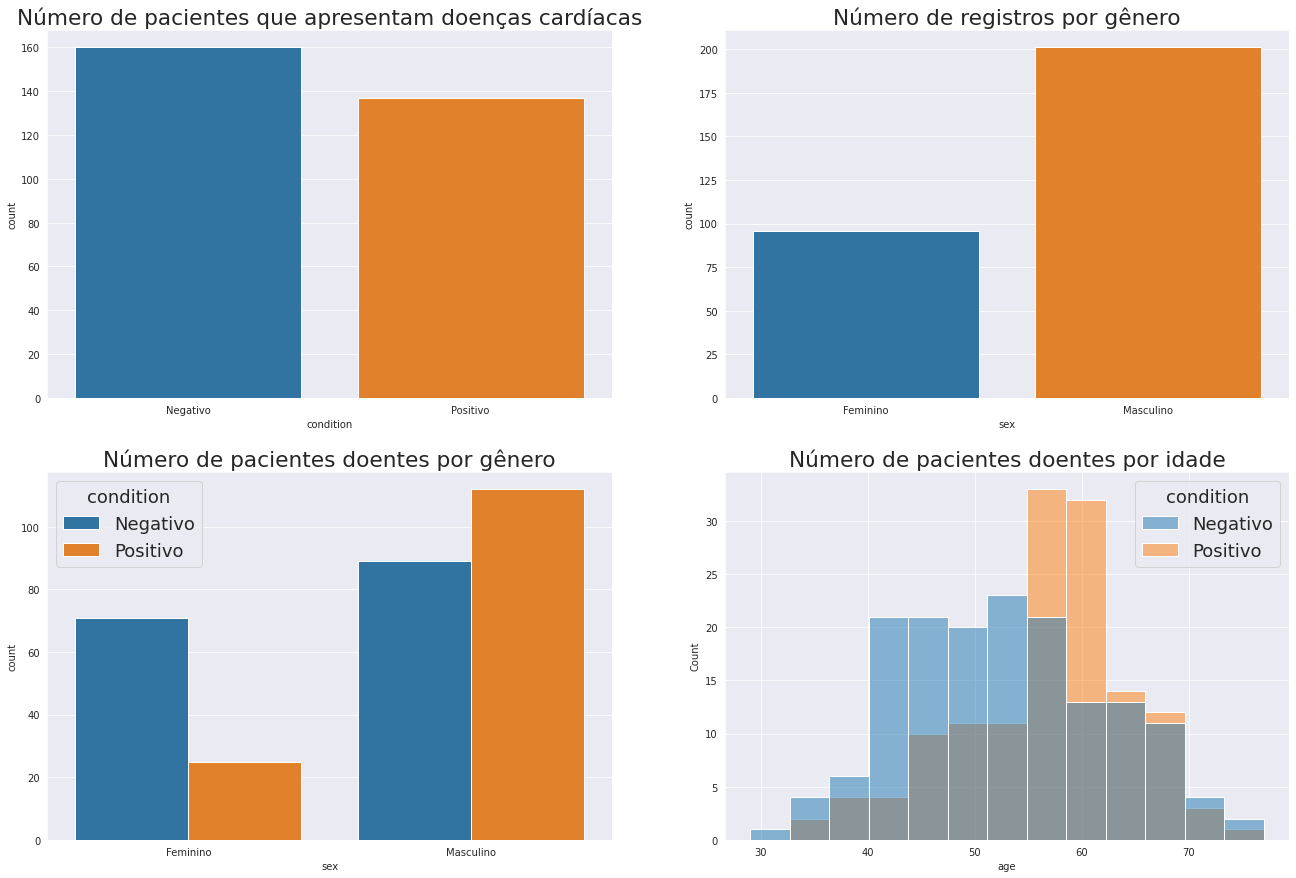

In [6]:
gender_categories = ['Feminino', 'Masculino']
cp_categories =  ['Ang. típica', 'Ang. atípica', 'Não anginal', 'Assintom.']
fbs_categories = ['< 120mg/dl', '>= 120mg/dl']
restecg_categories = ['Normal', 'Anomalia ST-T', 'Hipertrof. ventric. esq.']
exang_categories = ['Negativo', 'Positivo']
slope_categories = ['Ascendente', 'Plana', 'Descendente']
thal_categories = ['Normal', 'Defeito fixo', 'Def. reversível']
condition_categories = ['Negativo', 'Positivo']


exp_heart = heart.copy()
exp_heart.condition = exp_heart.condition.map(lambda x: condition_categories[x])
exp_heart.sex = exp_heart.sex.map(lambda x: gender_categories[x])
exp_heart.cp = exp_heart.cp.map(lambda x: cp_categories[x])
exp_heart.fbs = exp_heart.fbs.map(lambda x: fbs_categories[x])
exp_heart.restecg = exp_heart.restecg.map(lambda x: restecg_categories[x])
exp_heart.exang = exp_heart.exang.map(lambda x: exang_categories[x])
exp_heart.slope = exp_heart.slope.map(lambda x: slope_categories[x])
exp_heart.thal = exp_heart.thal.map(lambda x: thal_categories[x-1])

exp_heart.condition = pd.Categorical(exp_heart.condition, categories=condition_categories, ordered=False)
exp_heart.sex = pd.Categorical(exp_heart.sex, categories=gender_categories, ordered=False)
exp_heart.cp = pd.Categorical(exp_heart.cp, categories=cp_categories, ordered=False)
exp_heart.fbs = pd.Categorical(exp_heart.fbs, categories=fbs_categories, ordered=False)
exp_heart.restecg = pd.Categorical(exp_heart.restecg, categories=restecg_categories, ordered=False)
exp_heart.exang = pd.Categorical(exp_heart.exang, categories=exang_categories, ordered=False)
exp_heart.slope = pd.Categorical(exp_heart.slope, categories=slope_categories, ordered=False)
exp_heart.thal = pd.Categorical(exp_heart.thal, categories=thal_categories, ordered=False)

fig, axis = plt.subplots(2,2, figsize=(6,6))
plt.rcParams.update({'font.size': 18})

plt.subplots_adjust(top=2, right=3)

sns.countplot(data=exp_heart, x="condition", ax=axis[0,0]);
axis[0,0].set_title('Número de pacientes que apresentam doenças cardíacas');

sns.countplot(data=exp_heart, x="sex", ax=axis[0,1])
axis[0,1].set_title('Número de registros por gênero')

sns.countplot(data=exp_heart, x="sex", hue="condition", ax=axis[1,0])
axis[1,0].set_title('Número de pacientes doentes por gênero')

sns.histplot(data=exp_heart, x="age", hue="condition", ax=axis[1,1])
axis[1,1].set_title('Número de pacientes doentes por idade')

O dataset é balanceado com relação ao número de pacientes sem e com doenças cardiovasculares: há aproximadamente 160 registros de pacientes saudáveis e 140 de pacientes com patologias. O número de pacientes por gênero aparenta ser mais desequilibrado, contando com mais de 200 homens e aproximadamente 100 mulheres.

O gráfico de presença de doença por gênero indica que pode haver uma relação entre doença e gênero: uma proporção maior de homens apresenta doença diante do total de pacientes daquele gênero, enquanto no sexo feminino há mais pacientes saudáveis do que doentes.

Com relação à idade, há maior número de pacientes doentes entre aproximadamente 55 e 70 anos. Nas demais faixas de idade, o número de pacientes saudáveis supera o de pacientes com doenças cardíacas.

Text(0.5, 1.0, 'Número de vasos sanguíneos colorizados por fluoroscopia')

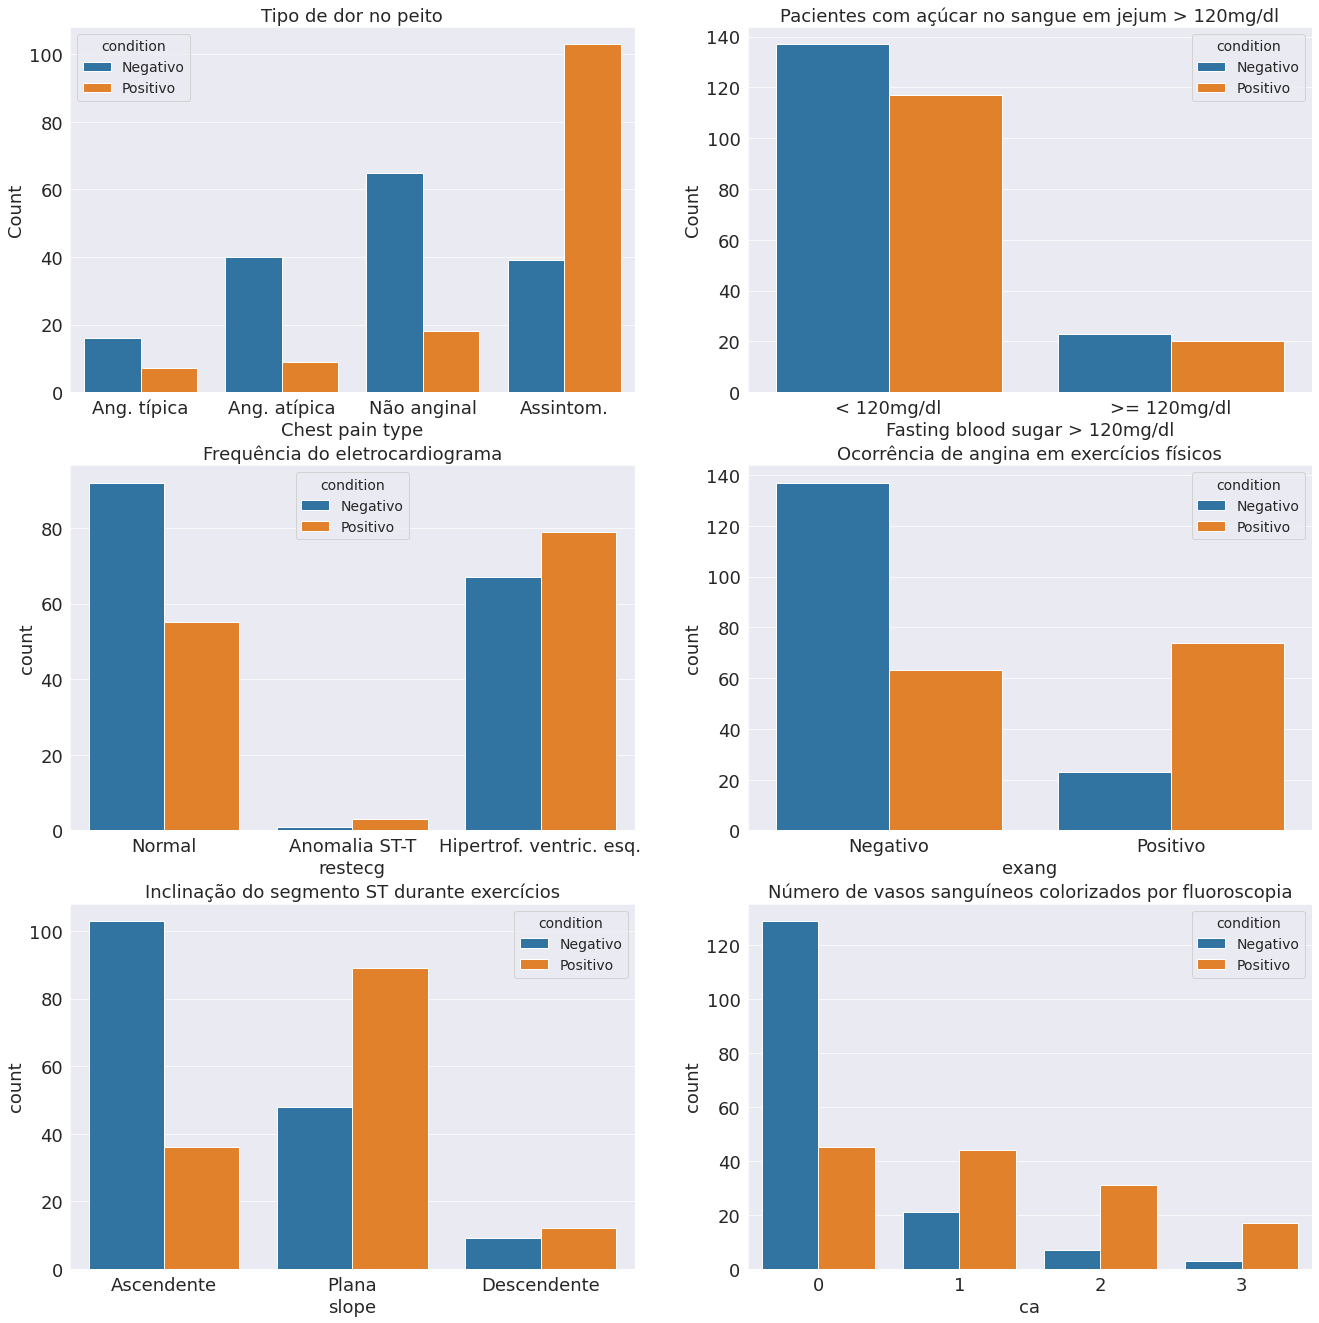

In [7]:
fig, axis = plt.subplots(3, 2, figsize=(6,6))
plt.rcParams.update({'font.size': 14})
plt.subplots_adjust(top=3, right=3)

sns.countplot(data=exp_heart, x="cp", hue="condition", ax=axis[0,0])
axis[0,0].set_xlabel('Chest pain type')
axis[0,0].set_ylabel('Count')
axis[0,0].set_title('Tipo de dor no peito', fontsize=18)

sns.countplot(data=exp_heart, x="fbs", hue="condition", ax=axis[0,1])
axis[0,1].set_xlabel('Fasting blood sugar > 120mg/dl')
axis[0,1].set_ylabel('Count')
axis[0,1].set_title('Pacientes com açúcar no sangue em jejum > 120mg/dl', fontsize=18)

sns.countplot(data=exp_heart, x="restecg", hue="condition", ax=axis[1,0]);
axis[1,0].set_title('Frequência do eletrocardiograma', fontsize=18)

sns.countplot(data=exp_heart, x="exang", hue="condition", ax=axis[1,1])
axis[1,1].set_title('Ocorrência de angina em exercícios físicos', fontsize=18)

sns.countplot(data=exp_heart, x="slope", hue="condition", ax=axis[2,0])
axis[2,0].set_title('Inclinação do segmento ST durante exercícios', fontsize=18)

sns.countplot(data=exp_heart, x="ca", hue="condition", ax=axis[2,1])
axis[2,1].set_title('Número de vasos sanguíneos colorizados por fluoroscopia', fontsize=18)

Curiosamente, pacientes assintomáticos quanto a dor peitoral demonstraram maior proporção de doentes do que os que apresentaram dores. Considerando a realização de exercícios, no entanto, os pacientes que tiveram dores eram, em sua maioria, portadores de doenças cardíacas. 

Dos demais atributos, o que apresenta maior indicação de doenças cardíacas é o número de vasos sanguíneos colorizados por fluoroscopia. Quanto maior o número de vasos colorizados no exame, maior a proporção de pacientes portadores de doenças.

Text(0.5, 1.0, 'Declínio do Segmento ST em pico de atividade física')

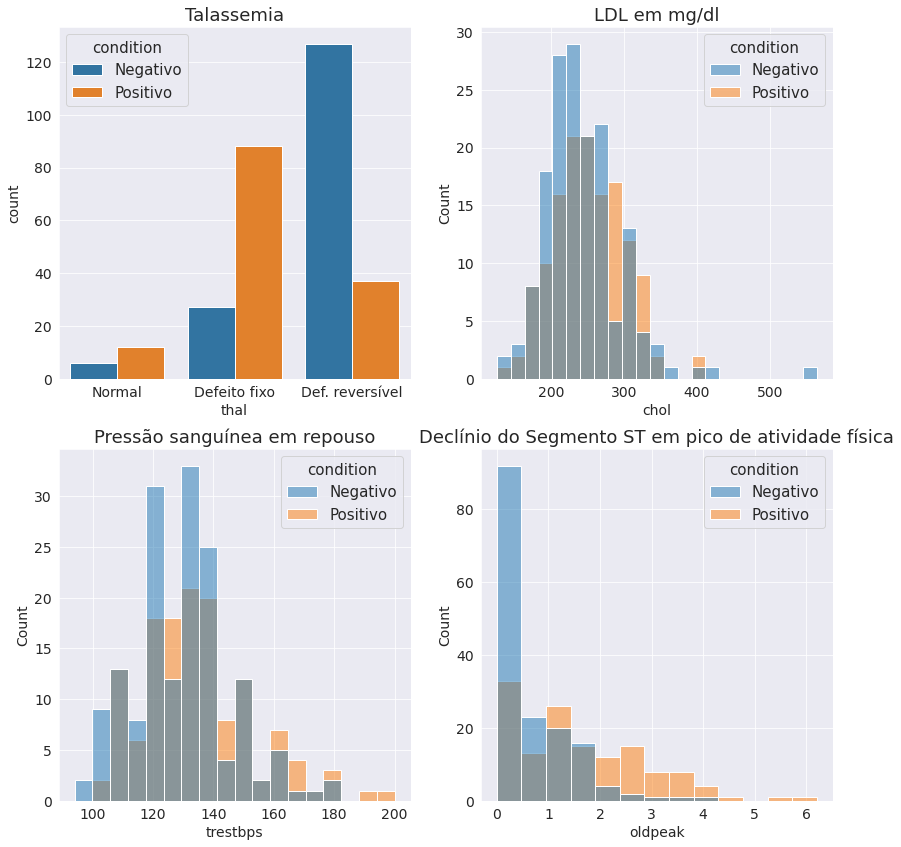

In [8]:
fig, axis = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(top=1.2, right=1.2)
plt.rcParams.update({'font.size': 15})

sns.countplot(data=exp_heart, x="thal", hue="condition", ax=axis[0,0]);
axis[0,0].set_title("Talassemia")

sns.histplot(exp_heart, x="chol", hue="condition", ax=axis[0,1]);
axis[0,1].set_title("LDL em mg/dl")

sns.histplot(exp_heart, x="trestbps", hue="condition", ax=axis[1,0]);
axis[1,0].set_title("Pressão sanguínea em repouso")

sns.histplot(exp_heart, x="oldpeak", hue="condition", ax=axis[1,1]);
axis[1,1].set_title("Declínio do Segmento ST em pico de atividade física")

A variável "thal" indicando diferentes categorias de talassemia aparente ser um possível critério indicador de presença de doenças cardíacas. A variável oldpeak, que representa o grau de declínio do segmento ST do eletrocardiograma, também pode ser um possível critério de detecção.

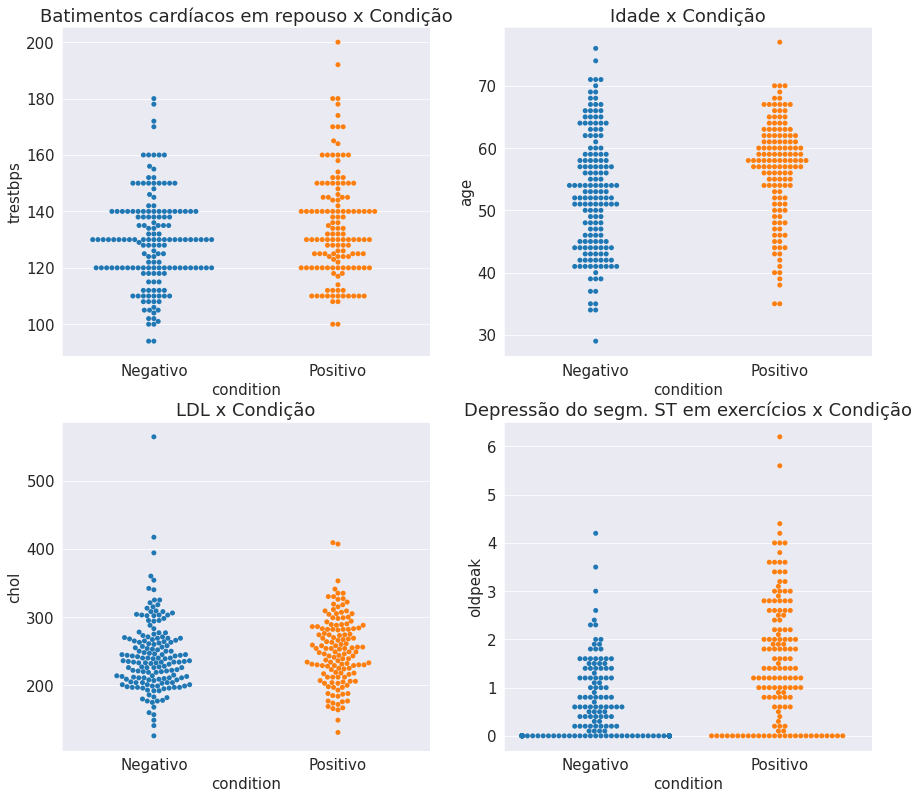

In [9]:
fig, axis = plt.subplots(2, 2, figsize=(6,6))
plt.subplots_adjust(top=1.8, right=2)
plt.rcParams.update({'font.size': 15})

sns.swarmplot(data=exp_heart, x="condition", y="trestbps", ax=axis[0,0])
axis[0,0].set_title("Batimentos cardíacos em repouso x Condição")

sns.swarmplot(data=exp_heart, x="condition", y="age", ax=axis[0,1])
axis[0,1].set_title("Idade x Condição")

sns.swarmplot(data=exp_heart, x="condition", y="chol", ax=axis[1,0])
axis[1,0].set_title("LDL x Condição")

sns.swarmplot(data=exp_heart, x="condition", y="oldpeak", ax=axis[1,1])
axis[1,1].set_title("Depressão do segm. ST em exercícios x Condição");

Os swarmplots acima representam outra forma de encarar a relação entre as variáveis numéricas e a variável categórica condition. As variáveis idade e depressão do segmento ST aparentam ser mais fortes indicadores de doenças cardíacas, demonstrando maior concentração de pontos em valores altos do que valores baixos.

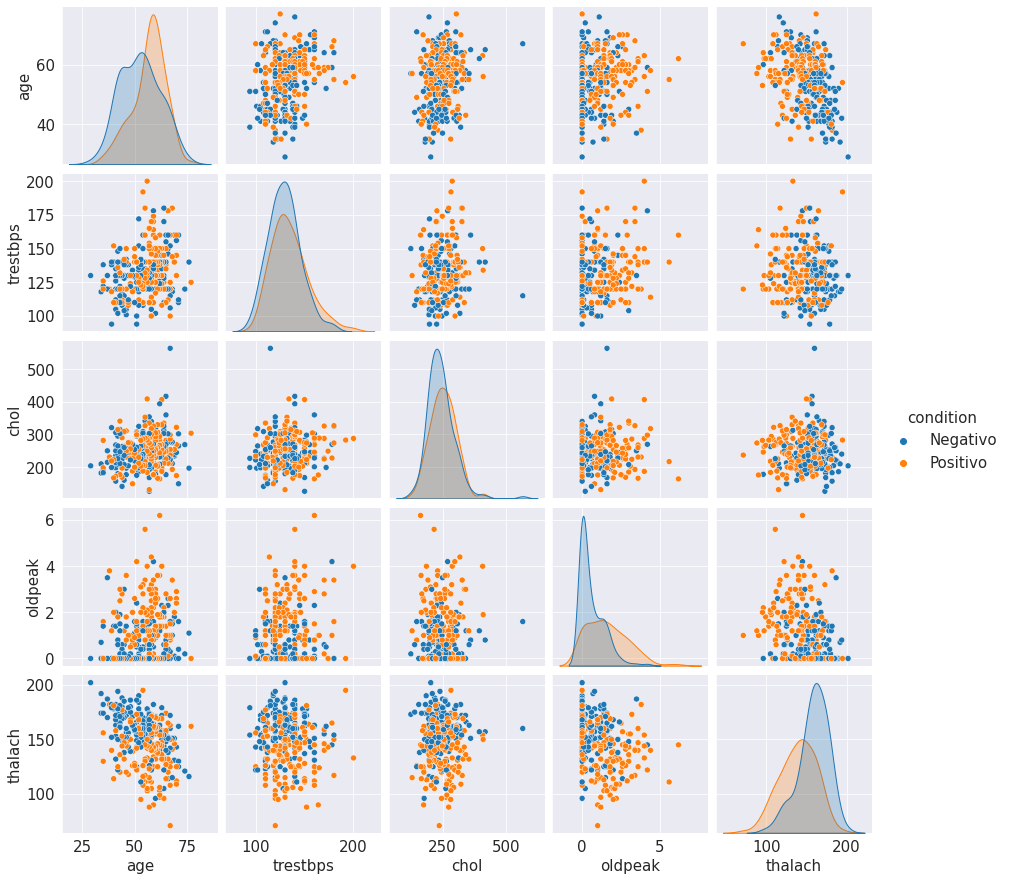

In [10]:
num_var = ["age", "trestbps", "chol", "oldpeak", "condition", "thalach"]
num_df = exp_heart[num_var]

sns.pairplot(num_df, hue="condition");

No gráfico acima, estuda-se ainda a dispersão conjunta das variáveis numéricas, bem como sua relação com a variável-alvo. A variável age, como visto nos histogramas exibidos anteriormente, parece permitir distinguir pacientes doentes de saudáveis quando apresenta valores altos. Oldpeak apresenta características semelhantes, enquanto thalac tem maior presença de pacientes doentes em valores baixos. Pelos gráficos de dispersão, não é possível discernir um critério de separação claro entre as variáveis numéricas, bem como não parece sugerir que não há correlação significativa entre elas que possa ser explorada em análise e modelagem.

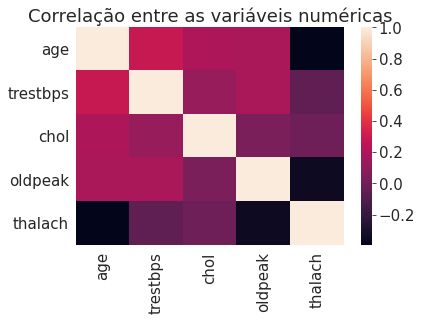

In [11]:
corr_variables = ["age", "trestbps", "chol", "oldpeak", "condition", "thalach"]

corr_df = exp_heart[corr_variables].corr()
sns.heatmap(corr_df);
plt.title("Correlação entre as variáveis numéricas");

O mapa de calor acima, ilustrando a correlação de Pearson entre as variáveis numéricas, indicam que de fato não parece haver correlação (linear) entre as variáveis numéricas da base de dados.

Em uma última tentativa de distinguir possíveis vias de distinguir duas classes alvo, é utilizada ainda a análise de componentes principais para tornar possível a visualização o dataset em duas dimensões, considerando a classe-alvo.

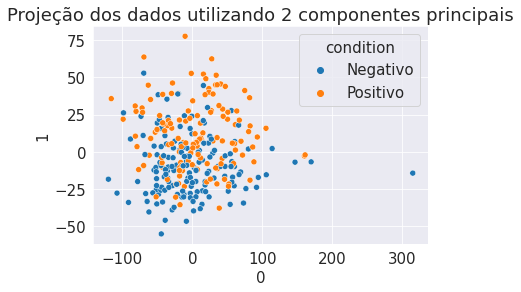

In [12]:
baseline_df = exp_heart.copy()
baseline_df["sex"] = baseline_df["sex"].cat.codes
baseline_df["fbs"] = baseline_df["fbs"].cat.codes
baseline_df["exang"] = baseline_df["exang"].cat.codes
baseline_df["condition"] = baseline_df["condition"].cat.codes
baseline_df["cp"] = baseline_df["cp"].cat.codes
baseline_df["restecg"] = baseline_df["restecg"].cat.codes
baseline_df["slope"] = baseline_df["slope"].cat.codes
baseline_df["thal"] = baseline_df["thal"].cat.codes


pca = PCA(n_components=2)
pca_result = pca.fit_transform(baseline_df.loc[:, baseline_df.columns != "condition"])
pca_df = pd.DataFrame(pca_result)
pca_df["condition"] = exp_heart["condition"]
pca_df.iloc[:,0]
sns.scatterplot(data=pca_df, x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], hue="condition");
plt.title("Projeção dos dados utilizando 2 componentes principais");

Utilizando 2 componentes principais, a projeção dos dados neste novo espaço reflete a proximidade dos pontos pertencentes às duas classes. Nestas circunstâncias, a separação em classes distintas pode ser dificultada.

Com base nas análises acima, parecem destacar-se as variáveis sex, age, cp, exang, ca e oldpeak como candidatos a fatores preditores da variável condition. Além disso, o valor 1 da variável thal (talassemia, defeito fixo) também é um possível indicador. As etapas a seguir tratarão de pré-processamento, modelagem e avaliação de modelos.

Primeiramente, serão ajustados modelos no dataset com mínimo pré-processamento, de maneira a obter uma referência de desempenho de onde possíveis melhorias podem ser identificadas. Neste passo, as variáveis categóricas serão convertidas em números inteiros e os modelos serão avaliados utilizando 10-fold cross validation.

In [13]:
baseline_df = exp_heart.copy()
baseline_df["sex"] = baseline_df["sex"].cat.codes
baseline_df["fbs"] = baseline_df["fbs"].cat.codes
baseline_df["exang"] = baseline_df["exang"].cat.codes
baseline_df["condition"] = baseline_df["condition"].cat.codes
baseline_df["cp"] = baseline_df["cp"].cat.codes
baseline_df["restecg"] = baseline_df["restecg"].cat.codes
baseline_df["slope"] = baseline_df["slope"].cat.codes
baseline_df["thal"] = baseline_df["thal"].cat.codes
baseline_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,2,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,2,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,2,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,1,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,1,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,1,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,2,0


In [19]:
def evaluate_knn(n_neighbors, df, score_dict):
    x = df.loc[:, df.columns != "condition"]
    y = df["condition"]
    
    kfold = KFold(n_splits=10)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    test_scores = []
    train_scores= []
    
    for train_indexes, test_indexes in kfold.split(x, y):
        x_train, x_test = x.iloc[train_indexes,:], x.iloc[test_indexes,:]
        y_train, y_test = y[train_indexes], y[test_indexes]

        model = knn.fit(x_train, y_train)
        
        train_score = 1 - model.score(x_train, y_train)
        test_score = 1 - model.score(x_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)    
    
    avg_train_score = np.mean(np.array(train_scores))
    std_dev_train = np.std(np.array(train_scores))
    avg_test_score = np.mean(np.array(test_scores))
    std_dev_test = np.std(np.array(test_scores))
    
    
    scores_dict['Algoritmo'].append('KNN '+str(n_neighbors)+' vizinhos')
    
    scores_dict['Risco empírico (treino)'].append(avg_train_score)
    scores_dict['Desvio padrão (treino)'].append(std_dev_train)
    
    scores_dict['Risco esperado estimado (teste)'].append(avg_test_score)
    scores_dict['Desvio padrão (teste)'].append(std_dev_test)
    
    return scores_dict

def evaluate_logistic_regression(df, scores_dict):
    x = df.loc[:, df.columns != "condition"]
    y = df["condition"]
    kfold = KFold(n_splits=10)
    
    test_scores = []
    train_scores= []
    for train_indexes, test_indexes in kfold.split(x,y):
        x_train, x_test = x.iloc[train_indexes,:], x.iloc[test_indexes,:]
        y_train, y_test = y[train_indexes], y[test_indexes]

        model = LogisticRegression(random_state=0).fit(x_train, y_train)
       
        train_score = 1 - model.score(x_train, y_train)
        test_score = 1 - model.score(x_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)    
    
    avg_train_score = np.mean(np.array(train_scores))
    std_dev_train = np.std(np.array(train_scores))
    avg_test_score = np.mean(np.array(test_scores))
    std_dev_test = np.std(np.array(test_scores))
    
    
    scores_dict['Algoritmo'].append('Regressão logística')
    
    scores_dict['Risco empírico (treino)'].append(avg_train_score)
    scores_dict['Desvio padrão (treino)'].append(std_dev_train)
    
    scores_dict['Risco esperado estimado (teste)'].append(avg_test_score)
    scores_dict['Desvio padrão (teste)'].append(std_dev_test)
    return scores_dict
    
    
def evaluate_random_forest(df, scores_dict, max_depth=None):
    x = df.loc[:, df.columns != "condition"]
    y = df["condition"]
    kfold = KFold(n_splits=10)
    test_scores = []
    train_scores= []
    
    for train_indexes, test_indexes in kfold.split(x,y):
        x_train, x_test = x.iloc[train_indexes,:], x.iloc[test_indexes,:]
        y_train, y_test = y[train_indexes], y[test_indexes]    
    
        model = RandomForestClassifier(random_state=0, max_depth=max_depth).fit(x_train, y_train)
        
        train_score = 1 - model.score(x_train, y_train)
        test_score = 1 - model.score(x_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)    
    
    avg_train_score = np.mean(np.array(train_scores))
    std_dev_train = np.std(np.array(train_scores))
    avg_test_score = np.mean(np.array(test_scores))
    std_dev_test = np.std(np.array(test_scores))
    
    if(max_depth is None):
        scores_dict['Algoritmo'].append('Random Forest')
    else:
        scores_dict['Algoritmo'].append('Random Forest Profund. '+str(max_depth))
    
    scores_dict['Risco empírico (treino)'].append(avg_train_score)
    scores_dict['Desvio padrão (treino)'].append(std_dev_train)
    
    scores_dict['Risco esperado estimado (teste)'].append(avg_test_score)
    scores_dict['Desvio padrão (teste)'].append(std_dev_test)
    return scores_dict

scores_dict = {'Algoritmo' : [], 'Risco empírico (treino)':[], 'Desvio padrão (treino)': [],
              'Risco esperado estimado (teste)':[], 'Desvio padrão (teste)' :[]}
for n_neighbors in range(1, 11):
    scores_dict = evaluate_knn(n_neighbors, baseline_df, scores_dict)

scores_dict = evaluate_logistic_regression(baseline_df, scores_dict)
scores_dict = evaluate_random_forest(baseline_df, scores_dict)

scores_df = pd.DataFrame.from_dict(scores_dict)
scores_df['Diferença'] = abs(scores_df['Risco empírico (treino)'] - scores_df['Risco esperado estimado (teste)'])
scores_df

,Algoritmo,Risco empírico (treino),Desvio padrão (treino),Risco esperado estimado (teste),Desvio padrão (teste),Diferença
0,KNN 1 vizinhos,0.000000,0.000000,0.447931,0.095420,0.447931
1,KNN 2 vizinhos,0.221101,0.007940,0.445287,0.124276,0.224186
2,KNN 3 vizinhos,0.228210,0.006326,0.370575,0.072379,0.142365
3,KNN 4 vizinhos,0.239812,0.009247,0.374713,0.127659,0.134900
4,KNN 5 vizinhos,0.221844,0.012908,0.370575,0.085264,0.148730
5,KNN 6 vizinhos,0.267867,0.013887,0.391379,0.101673,0.123512
6,KNN 7 vizinhos,0.249906,0.013026,0.343218,0.061888,0.093312
7,KNN 8 vizinhos,0.273464,0.010725,0.377241,0.094446,0.103777
8,KNN 9 vizinhos,0.269354,0.012367,0.387011,0.084978,0.117657
9,KNN 10 vizinhos,0.285822,0.008429,0.374253,0.090966,0.088431


O teste inicial foi realizado com os algoritmos KNN, regressão logística e Random Forest. O KNN foi testado com 10 diferentes valores para o hiperparâmetro número de vizinhos, enquanto o Random Forest e a regressão logística foram inicializados com seus valores padrão.

Considerando a menor diferença de risco médio ($|R_{emp} - R_{teste}|$) e o desvio padrão de risco esperado estimado, o melhor desempenho foi alcançado pela regressão logística (0.023 e 0.067). O Random Forest possui o menor desvio padrão do risco esperado estimado (0.056) mas com a diferença de risco médio maior (0.185). Os melhores desempenhos obtidos pelo KNN foram o de 7 vizinhos (0.093 e 0.062) e o de 10 vizinhos (0.088 e 0.091), e de outro k adotados apresentaram diferença de risco médio elevado, o que era esperado dado que a falta de pré-processamento implica na dominância das variáveis numéricas sobre as demais.

No próximo teste, as variáveis numéricas serão normalizadas.

In [20]:
features = ["sex", "age", "cp", "exang", "ca", "oldpeak", "slope", "condition", "thal"]

numerical = ["age", "trestbps", "chol","oldpeak", "thalach"]
#filtered_df = baseline_df[features].copy()
filtered_df = baseline_df.copy()

scaler = StandardScaler()
norm_filtered_df = filtered_df.copy()
norm_filtered_df[numerical] = pd.DataFrame(scaler.fit_transform(norm_filtered_df[numerical]), columns=numerical)
#norm_filtered_df["oldpeak"] = pd.DataFrame(std_scaler.fit_transform(norm_filtered_df[["oldpeak"]]), columns=["oldpeak"])
norm_filtered_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,1.600302,1,0,1.596266,-0.257179,1,2,-0.812095,0,-0.820813,1,1,2,0
1,1.600302,0,0,0.468418,-0.160859,0,0,0.061157,0,0.639470,0,2,2,0
2,1.268242,0,0,1.032342,-0.411292,0,0,-1.554358,0,1.326662,2,0,2,0
3,1.157555,1,0,0.355633,0.667499,1,2,1.065396,0,0.295874,1,1,2,1
4,1.046868,1,0,-1.223355,-0.700254,0,2,-0.244481,1,0.639470,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-1.609620,1,3,1.145127,-0.469085,0,0,1.371034,0,-0.906712,0,0,1,1
293,-1.720306,1,3,-0.772215,-0.546141,0,0,-0.419131,0,0.124076,1,0,1,1
294,-2.163054,1,3,-0.659431,-0.950688,0,0,-0.855757,1,0.467672,1,0,1,1
295,-2.163054,0,3,0.355633,-1.239649,0,0,1.414697,0,0.295874,0,0,2,0


In [26]:
scores_dict = {'Algoritmo' : [], 'Risco empírico (treino)':[], 'Desvio padrão (treino)': [],
              'Risco esperado estimado (teste)':[], 'Desvio padrão (teste)' :[]}

for n_neighbors in range(1, 11):
    scores_dict = evaluate_knn(n_neighbors, norm_filtered_df, scores_dict)

scores_dict = evaluate_logistic_regression(norm_filtered_df, scores_dict)
scores_dict = evaluate_random_forest(norm_filtered_df, scores_dict)

scores_df = pd.DataFrame.from_dict(scores_dict)
scores_df['Diferença'] = abs(scores_df['Risco empírico (treino)'] - scores_df['Risco esperado estimado (teste)'])
scores_df

,Algoritmo,Risco empírico (treino),Desvio padrão (treino),Risco esperado estimado (teste),Desvio padrão (teste),Diferença
0,KNN 1 vizinhos,0.000000,0.000000,0.258736,0.061662,0.258736
1,KNN 2 vizinhos,0.117093,0.009427,0.269425,0.068897,0.152332
2,KNN 3 vizinhos,0.123829,0.007154,0.231839,0.084113,0.108010
3,KNN 4 vizinhos,0.146645,0.009608,0.215517,0.069588,0.068873
4,KNN 5 vizinhos,0.133187,0.005909,0.215287,0.076993,0.082101
5,KNN 6 vizinhos,0.146273,0.011458,0.208966,0.073969,0.062693
6,KNN 7 vizinhos,0.151511,0.009858,0.191954,0.060965,0.040443
7,KNN 8 vizinhos,0.170221,0.008727,0.191954,0.069370,0.021733
8,KNN 9 vizinhos,0.154873,0.009915,0.195287,0.076618,0.040414
9,KNN 10 vizinhos,0.169845,0.007273,0.192069,0.078560,0.022224


O KNN apresentou grande melhora, mostrando a diferença de risco menor menor que 0.1 para adoção de k maior igual a 3. Ambos o regressão logística e o Random Forest permaneceram o mesmo desempenho.

A proxima estratégia de pré-processamento consistirá em converter as variáveis categóricas não-binárias, cp, ca, slope e thal, em dummies. 

In [27]:
to_dummy_vars = ["cp", "ca", "slope", "thal"]
dummy_df = pd.get_dummies(norm_filtered_df, columns=to_dummy_vars)
dummy_df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,condition,...,ca_0,ca_1,ca_2,ca_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2
0,1.600302,1,1.596266,-0.257179,1,2,-0.812095,0,-0.820813,0,...,0,1,0,0,0,1,0,0,0,1
1,1.600302,0,0.468418,-0.160859,0,0,0.061157,0,0.639470,0,...,0,0,1,0,1,0,0,0,0,1
2,1.268242,0,1.032342,-0.411292,0,0,-1.554358,0,1.326662,0,...,1,0,0,0,0,0,1,0,0,1
3,1.157555,1,0.355633,0.667499,1,2,1.065396,0,0.295874,1,...,0,1,0,0,0,1,0,0,0,1
4,1.046868,1,-1.223355,-0.700254,0,2,-0.244481,1,0.639470,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-1.609620,1,1.145127,-0.469085,0,0,1.371034,0,-0.906712,1,...,1,0,0,0,1,0,0,0,1,0
293,-1.720306,1,-0.772215,-0.546141,0,0,-0.419131,0,0.124076,1,...,1,0,0,0,0,1,0,0,1,0
294,-2.163054,1,-0.659431,-0.950688,0,0,-0.855757,1,0.467672,1,...,1,0,0,0,0,1,0,0,1,0
295,-2.163054,0,0.355633,-1.239649,0,0,1.414697,0,0.295874,0,...,1,0,0,0,1,0,0,0,0,1


In [28]:
scores_dict = {'Algoritmo' : [], 'Risco empírico (treino)':[], 'Desvio padrão (treino)': [],
              'Risco esperado estimado (teste)':[], 'Desvio padrão (teste)' :[]}

for n_neighbors in range(1, 11):
    scores_dict = evaluate_knn(n_neighbors, dummy_df, scores_dict)

scores_dict = evaluate_logistic_regression(dummy_df, scores_dict)
scores_dict = evaluate_random_forest(dummy_df, scores_dict)

scores_df['Diferença'] = abs(scores_df['Risco empírico (treino)'] - scores_df['Risco esperado estimado (teste)'])
scores_df

,Algoritmo,Risco empírico (treino),Desvio padrão (treino),Risco esperado estimado (teste),Desvio padrão (teste),Diferença
0,KNN 1 vizinhos,0.000000,0.000000,0.258736,0.061662,0.258736
1,KNN 2 vizinhos,0.117093,0.009427,0.269425,0.068897,0.152332
2,KNN 3 vizinhos,0.123829,0.007154,0.231839,0.084113,0.108010
3,KNN 4 vizinhos,0.146645,0.009608,0.215517,0.069588,0.068873
4,KNN 5 vizinhos,0.133187,0.005909,0.215287,0.076993,0.082101
5,KNN 6 vizinhos,0.146273,0.011458,0.208966,0.073969,0.062693
6,KNN 7 vizinhos,0.151511,0.009858,0.191954,0.060965,0.040443
7,KNN 8 vizinhos,0.170221,0.008727,0.191954,0.069370,0.021733
8,KNN 9 vizinhos,0.154873,0.009915,0.195287,0.076618,0.040414
9,KNN 10 vizinhos,0.169845,0.007273,0.192069,0.078560,0.022224


Não houve mudança comparado ao resultado de pre-processamento anterior, em resumo, o Random Forest apresentou overfitting por ter atingido 0 erro no conjunto de treino, mas com erro 0.18 no conjunto de teste. Dado que o padrão da biblioteca sklearn é não limitar a profundidade das árvores que compõem o classificador, é possível que um ajuste dos hiperparâmetros melhore seu desempenho.

A regressão logística apresentou resultado satisfátorio, obtindo diferença de risco médio 0.028  com desvio padrão 0.063. 

O KNN, por sua vez, é o de 8 vizinhos que tem o menor risco médio (0.022) com desvio padrão 0.069.

Repete-se o teste do modelo Random Forest com diferentes limites para a profundidade das árvores.

In [42]:
scores_dict = {'Algoritmo' : [], 'Risco empírico (treino)':[], 'Desvio padrão (treino)': [],
              'Risco esperado estimado (teste)':[], 'Desvio padrão (teste)' :[]}

tree_dict = {'Profundidade': [], 'Risco empírico (treino)': [], 'Risco esperado estimado (teste)': []}
for depth in range(1, 13):
    scores_dict = evaluate_random_forest(dummy_df, scores_dict, max_depth=depth)
    tree_dict["Profundidade"].append(depth)
    tree_dict["Risco empírico (treino)"].append(scores_dict["Risco empírico (treino)"][depth-1])
    tree_dict["Risco esperado estimado (teste)"].append(scores_dict["Risco esperado estimado (teste)"][depth-1])
    
scores_df = pd.DataFrame.from_dict(scores_dict)
tree_df = pd.DataFrame.from_dict(tree_dict)
tree_df['Diferença'] = abs(tree_df['Risco empírico (treino)']-tree_df['Risco esperado estimado (teste)'])
tree_df

,Profundidade,Risco empírico (treino),Risco esperado estimado (teste),Diferença
0,1,0.161240,0.191494,0.030254
1,2,0.141046,0.184828,0.043781
2,3,0.126824,0.164483,0.037659
3,4,0.104001,0.181379,0.077378
4,5,0.072577,0.191494,0.118918
5,6,0.033665,0.198161,0.164496
6,7,0.016458,0.198506,0.182047
7,8,0.004490,0.191494,0.187004
8,9,0.001497,0.194713,0.193216
9,10,0.000000,0.184598,0.184598


Profundidade  3  


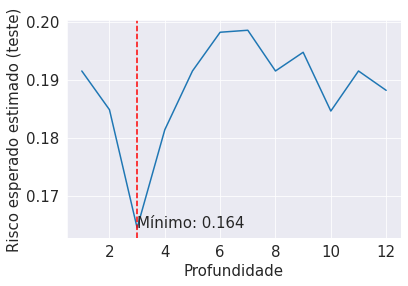

In [39]:
plot = sns.lineplot(x=tree_df["Profundidade"], y=tree_df["Risco esperado estimado (teste)"])
min_row = tree_df[tree_df['Risco esperado estimado (teste)'] == tree_df['Risco esperado estimado (teste)'].min()]
min_index = min_row["Profundidade"].iloc[0]
min_value = min_row["Risco esperado estimado (teste)"].iloc[0]

plt.axvline(min_index, color='r', linestyle='--')
plt.text(x=min_index, y=min_value, s="Mínimo: 0.164")
print('Profundidade ', min_index, ' ' )

Nota-se que a precisão da Random Forest atingiu o menor limitando-se a profundidade a 3, alcançando 0.038 em comparação com o 0.18 obtido nos testes anteriores. Além disso, o risco médio no conjunto de treino é mais próximo que conjunto de teste, indicando menor probabilidade de overfitting. Com profundidade a partir de 8, o classificador passa a obter precisão quase perfeita no conjunto de treino sem apresentar melhorias no conjunto de teste, indicando sinais de overfitting.

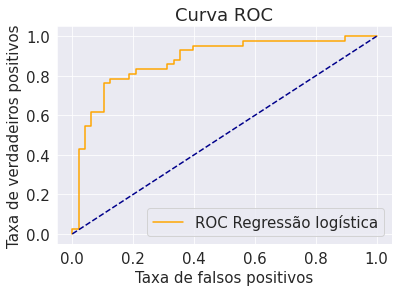

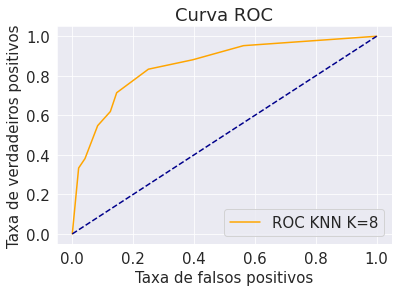

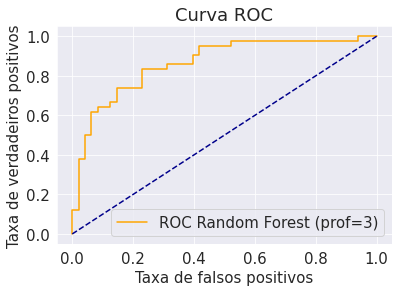

In [43]:
def plot_roc_curve(fper, tper, model_name):  
    plt.plot(fper, tper, color='orange', label='ROC '+model_name)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falsos positivos')
    plt.ylabel('Taxa de verdadeiros positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

x = dummy_df.loc[:, dummy_df.columns != "condition"]
y = dummy_df["condition"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

auc_dict = {'Algoritmo': [], 'AUC':[]}
model = LogisticRegression(random_state=0).fit(x_train, y_train)
probabilities = model.predict_proba(x_test)
probabilities = probabilities[:, 1]
false_positives, true_positives, thresholds = roc_curve(y_test, probabilities)
plot_roc_curve(false_positives, true_positives, "Regressão logística")
auc_dict["Algoritmo"].append('Regressão logística')
auc_dict["AUC"].append(auc(false_positives, true_positives))

model = KNeighborsClassifier(n_neighbors=8).fit(x_train, y_train)
probabilities = model.predict_proba(x_test)
probabilities = probabilities[:, 1]
false_positives, true_positives, thresholds = roc_curve(y_test, probabilities)
plot_roc_curve(false_positives, true_positives, "KNN K=8")
auc_dict["Algoritmo"].append('KNN K=8')
auc_dict["AUC"].append(auc(false_positives, true_positives))

model = RandomForestClassifier(random_state=0, max_depth=3).fit(x_train, y_train)
probabilities = model.predict_proba(x_test)
probabilities = probabilities[:, 1]
false_positives, true_positives, thresholds = roc_curve(y_test, probabilities)
plot_roc_curve(false_positives, true_positives, "Random Forest (prof=3)")
auc_dict["Algoritmo"].append('Random forest (prof=3)')
auc_dict["AUC"].append(auc(false_positives, true_positives))

In [44]:
auc_df = pd.DataFrame.from_dict(auc_dict)
auc_df

,Algoritmo,AUC
0,Regressão logística,0.878472
1,KNN K=8,0.853919
2,Random forest (prof=3),0.864087


Conforme indicado pelas curvas ROC e pelo valor da AUC (area under curve), o classificador baseado em Random Forest foi capaz de discernir verdadeiros positivos e falsos positivos com precisão muito próxima à da regressão logística, superando-a por uma margem pequena. Por sua vez, o classificador baseado em KNN com K=8 alcançou AUC mais baixo que os demais modelos.

Text(0.5, 1.0, 'Matriz de confusão Random Forest')

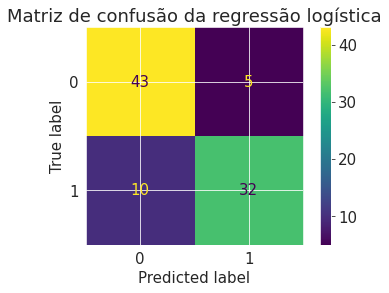

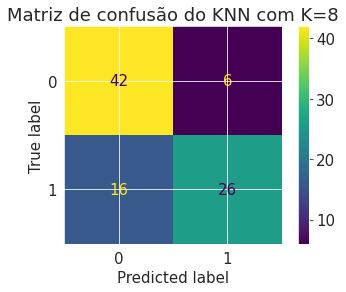

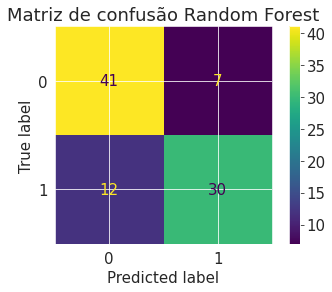

In [45]:
model = LogisticRegression(random_state=0).fit(x_train, y_train)
model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)
plt.title("Matriz de confusão da regressão logística")

model = KNeighborsClassifier(n_neighbors=8).fit(x_train, y_train)
model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)
plt.title("Matriz de confusão do KNN com K=8")

model = RandomForestClassifier(random_state=0, max_depth=3).fit(x_train, y_train)
model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)
plt.title("Matriz de confusão Random Forest")

As matrizes de confusão confirmam o resultado observado nas curvas ROC, em que a random forest e a regressão logística atingiram métricas de desempenho muito próximas.

O KNN, por sua vez, resultou em maior quantidade de falsos negativos. Para os propósito de diagnóstico de doenças cardíacas, falsos negativos são indesejáveis e, portanto, este classificador deve ser evitado.

## Seleção de hiperparâmetros usando grid search

É possível também utilizar uma heurística de busca como o grid search para ajustar os hiperparâmetros de cada modelo. Neste, o espaço de busca dos hiperparâmetros é discretizado e a função objeivo utiliza uma métrica de avaliação do modelo, como acurácia, sensibilidade e F1 score, para determinar qual conjunto de hiperparâmetros resulta no melhor modelo. 

Na seção abaixo, emprega-se este método para encontrar os hiperparâmetros que otimizem o recall (ou revocação), que é dado pela equação abaixo:

# $ Recall = \frac{{tp}}{{tp+fn}} $

Destaca-se a presença do número de falsos negativos no denominador. Isto pode implicar que a maximização desta métrica leva à diminuição da ocorrência de falsos negativos, que é o resultado que mais se deseja evitar no caso de um modelo de classificação de pacientes com doenças. Em seguida, são computadas as curvas de acurácia no conjunto de teste, acurácia no conjunto de treino, recall no conjunto de teste e F1-score para avaliar o impacto de cada hiperparâmetro no desempenho do modelo.

Nota: O F1-score é uma métrica que pondera, além do recall, a métrica precision. São dadas pelas seguintes fórmulas:

# $ Precision = \frac{tp}{tp+fp} $ 

# $ F1 score = \frac{2 * precision * recall} {precision + recall} $

Enquanto a medida precision destaca a taxa de falsos positivos, a F1-score pode oferecer uma perspectiva do equilíbrio entre falsos positivos e negativos atingido por cada modelo ao considerar ambas precision e recall em sua formulação.

In [46]:
norm_filtered_df
scoring = ["accuracy", "f1", "roc_auc", "precision", "recall"]

knn_parameters = {"n_neighbors": [x for x in range(1, 11)],
                  "weights": ["uniform", "distance"], 
                  "algorithm": ["auto","ball_tree","kd_tree", "brute"],
                  "p": [x for x in range(1, 11)]}

model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=model, 
                               param_grid=knn_parameters, 
                               scoring=scoring, 
                               cv=10,
                               return_train_score=True, 
                               refit="recall")

grid_search_knn.fit(x, y);

In [47]:
forest_parameters = {"criterion": ["gini", "entropy"],
                     "max_depth": [x for x in range(1, 14)],
                     "max_features":["auto", "sqrt", "log2", None],
                     "min_samples_split": [x for x in range(1, 10)]}

model = RandomForestClassifier()
grid_search_random_forest = GridSearchCV(estimator=model, 
                               param_grid=forest_parameters, 
                               scoring=scoring, 
                               cv=10,
                               return_train_score=True, 
                               refit="recall")

grid_search_random_forest.fit(x,y);

In [271]:
lr_parameters = {"penalty":["l1", "l2", "elasticnet","none"],
                 "fit_intercept": [True, False],
                 "max_iter": [x for x in range(50, 300, 20)] 
                }

model = LogisticRegression()
grid_search_logistic_regression = GridSearchCV(estimator=model, 
                               param_grid=lr_parameters, 
                               scoring=scoring, 
                               cv=10,
                               return_train_score=True, 
                               refit="f1")

grid_search_logistic_regression.fit(x,y);

Otimizando para recall, o grid search encontrou o seguinte conjunto de hiperparâmetros para o KNN: 
* Número de vizinhos: 5


* p: p=1. Este hiperparâmetro denota a potência utilizada no cálculo de distância utilizado pelo algoritmo, segundo a fórmula $ {\sqrt[p]{\sum_{n=1}^{k}(X_i-Y_i)^p}} $


* Ponderação da influência de cada exemplo: uniforme. As opções eram uniform e distance. Distance faz com que os elementos mais próximos tenham maior influência sobre a determinação da classe do ponto avaliado, ao fazer com que os elementos sejam multiplicados pelo inverso de sua distância. Uniforme não aplica esta distinção.


* Algoritmo: auto. As opções eram KDTree, BallTree, brute e auto. Este hiperparâmetro determina a utilização de um algoritmo para limitar o número de exemplos utilizados para computar a classe do vetor de dados apresentado ao modelo. É de se esperar que não haja grande variabilidade entre estes métodos, visto que a comparação com todos os elementos do conjunto de treino é pouco custosa em função do pequeno tamanho do conjunto de dados em análise.

In [48]:
knn_results = grid_search_knn.cv_results_

knn_results_df = pd.DataFrame.from_dict(knn_results)
knn_results_df = knn_results_df[["mean_train_accuracy", "mean_test_accuracy", "mean_test_roc_auc", "mean_train_roc_auc",
         "mean_test_precision", "mean_train_precision", "mean_test_recall", "mean_train_recall",
         "mean_test_f1", "mean_train_f1", "param_n_neighbors", "param_weights", "param_algorithm", "param_p"]]
print("Melhor conjunto de parâmetros do KNN: ", grid_search_knn.best_params_)

Melhor conjunto de parâmetros do KNN:  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


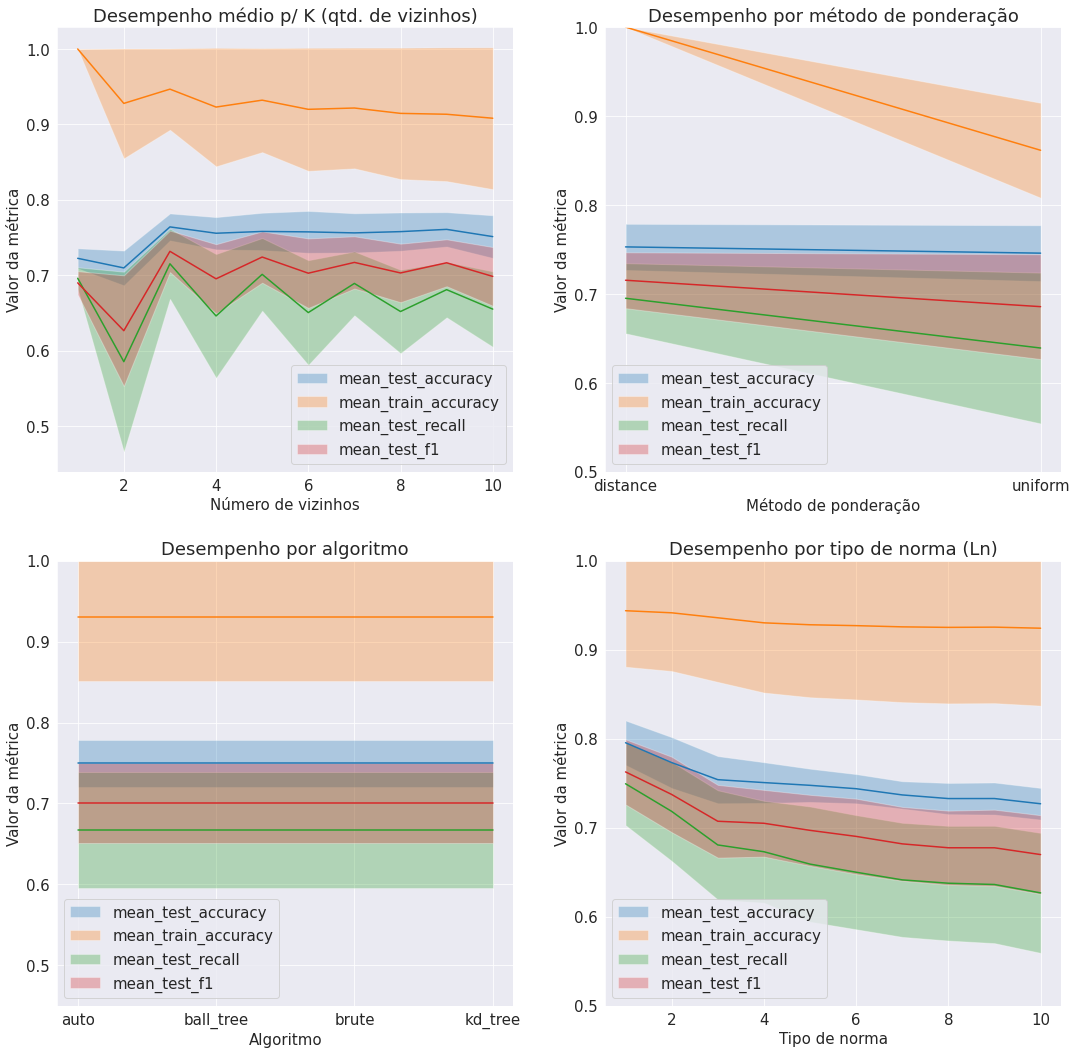

In [274]:
fig, axis = plt.subplots(2, 2, figsize=(18,18))

metrics = ["mean_test_accuracy", "mean_train_accuracy", "mean_test_recall", "mean_test_f1"]


def plot_hyperparameter_metric(hyperparameter, results, metrics, title, xlabel, ylabel, ax, 
                                   legend_loc=None, ylim=None):
    means = results.groupby(hyperparameter, as_index=False).mean()
    stds = results.groupby(hyperparameter, as_index=False).std()
    
    for metric in metrics:
        ax.plot(means[hyperparameter].unique(), means[metric])
        ax.fill_between(means[hyperparameter].unique(), means[metric]-stds[metric], 
                 means[metric]+stds[metric], alpha=0.3, label=metric)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)    
    
    if(legend_loc is not None):
        ax.legend(loc=legend_loc)
    else:
        ax.legend()
    if(ylim is not None):
        ax.set_ylim(*ylim)

k_plot_kwargs = {
  "hyperparameter": "param_n_neighbors",
  "results": knn_results_df,
  "metrics": metrics,
  "title": "Desempenho médio p/ K (qtd. de vizinhos)",
  "xlabel": "Número de vizinhos",
  "ylabel": "Valor da métrica",
  "ax": axis[0,0],
  "legend_loc": "lower right"
}

weight_plot_kwargs = {
    "hyperparameter": "param_weights",
    "results": knn_results_df,
    "metrics": metrics,
    "title": "Desempenho por método de ponderação",
    "xlabel": "Método de ponderação",
    "ylabel": "Valor da métrica",
    "ax": axis[0,1],
    "ylim": (0.5, 1.0)
}

algorithm_plot_kwargs = {
    "hyperparameter": "param_algorithm",
    "results": knn_results_df,
    "metrics": metrics,
    "title": "Desempenho por algoritmo",
    "xlabel": "Algoritmo",
    "ylabel": "Valor da métrica",
    "ax": axis[1,0],
    "ylim": (0.45, 1.0)
}

p_plot_kwargs = {
    "hyperparameter": "param_p",
    "results": knn_results_df,
    "metrics": metrics,
    "title": "Desempenho por tipo de norma (Ln)",
    "xlabel": "Tipo de norma",
    "ylabel": "Valor da métrica",
    "ax": axis[1,1],
    "ylim": (0.5, 1.0)
}

plot_hyperparameter_metric(**k_plot_kwargs)
plot_hyperparameter_metric(**weight_plot_kwargs)
plot_hyperparameter_metric(**algorithm_plot_kwargs)
plot_hyperparameter_metric(**p_plot_kwargs)

Nos gráficos acima, a linha que atravessa o centro de cada região colorida indica a média obtida para a métrica correspondente. A região sombreada equivale à distância de 1 desvio padrão do centro, configurando um intervalo de confiança de aproximadamente 68.27%. Este valor foi escolhido devido à alta dispersão observada para algumas dessas medidas, que faria com que os intervalos mais usuais de 94.45% (2x o desvio padrão) e 99.73% (3x o desvio padrão) dificultassem a visualização.

Nota-se que de fato não houve diferença entre os algoritmos que podam o número de nós comparados para determinação dos vizinhos mais próximos, provavelmente devido ao tamanho pequeno do conjunto de dados. O uso da ponderação dos vizinhos pelo inverso da distância parece ter provocado overfitting ao provocar muito maior acurácia no conjunto de treino do que de teste. As normas $ L^1 $ e $ L^2 $ tiveram desempenho melhor do que as demais, enquanto o uso de 5 vizinhos de fato parece oferecer resultados mais consistentes para todas as métricas.

Para o Random Forest, o grid search encontrou os seguintes hiperparâmetros:
* Critério de separação: Coeficiente de gini, dado pela fórmula $ 1-{\sum_{k=1}^{n-1}(X_{k+1}-X_{k})(Y_{k+1}+Y_{k})}$. A outra opção era variação de entropia. 
* Profundidade máxima da árvore: 2
* Número máximo de atributos a considerar durante a separação de um nó: $ log_2 n $, sendo n o número de atributos da base
* Número mínimo de amostras para separar um nó: 9

In [252]:
rf_results = grid_search_random_forest.cv_results_
rf_results_df = pd.DataFrame.from_dict(rf_results)

rf_results_df = rf_results_df[["mean_train_accuracy", "mean_test_accuracy", "mean_test_roc_auc", "mean_train_roc_auc",
         "mean_test_precision", "mean_train_precision", "mean_test_recall", "mean_train_recall",
         "mean_test_f1", "mean_train_f1", "param_criterion", "param_max_depth", "param_max_features", 
         "param_min_samples_split"]]

metrics = ["mean_test_accuracy", "mean_train_accuracy", "mean_test_recall", "mean_test_f1"]

print("Melhor conjunto de parâmetros do Random Forest:", grid_search_random_forest.best_params_)

Melhor conjunto de parâmetros do Random Forest: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 9}


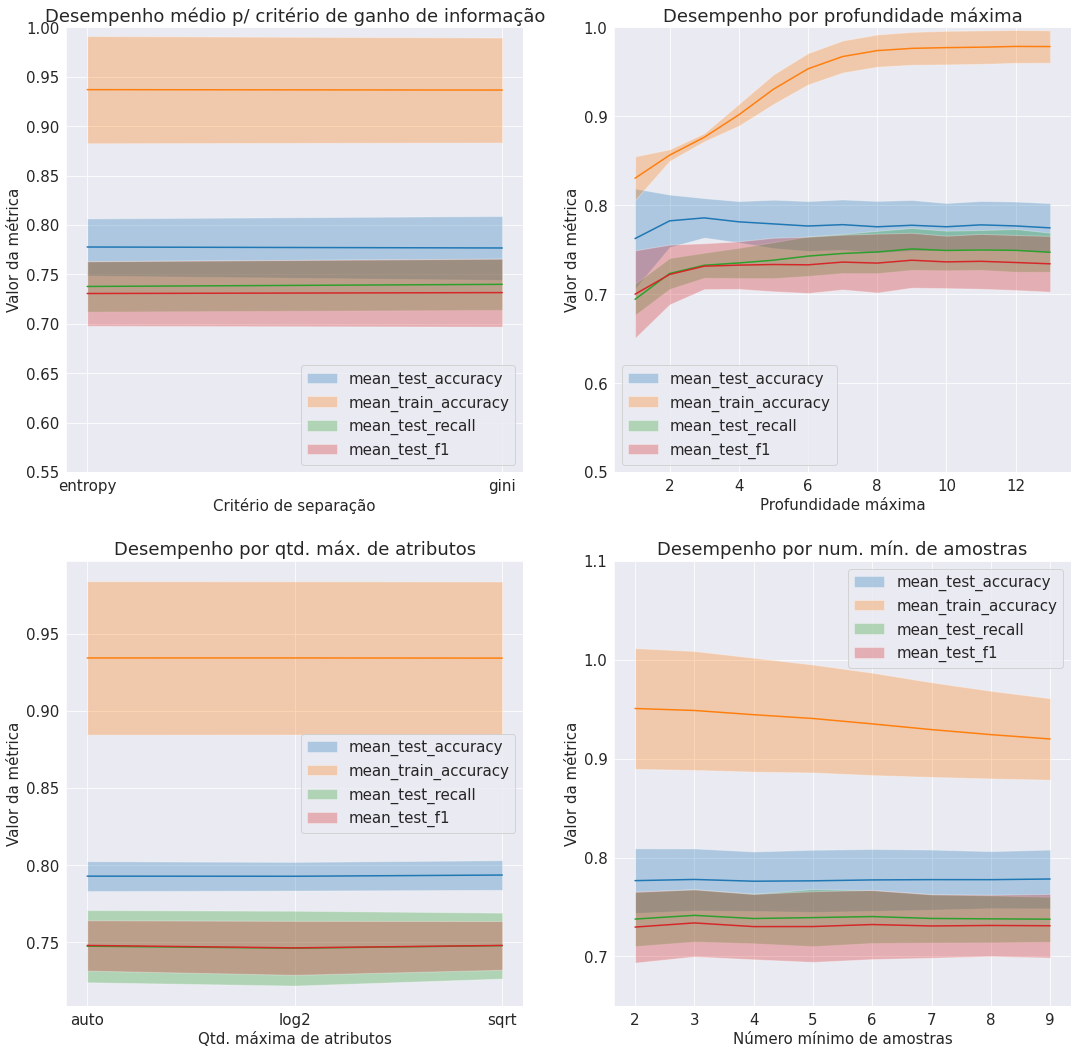

In [245]:
fig, axis = plt.subplots(2,2, figsize=(18,18))

criterion_plot_kwargs = {
  "hyperparameter": "param_criterion",
  "results": rf_results_df,
  "metrics": metrics,
  "title": "Desempenho médio p/ critério de ganho de informação",
  "xlabel": "Critério de separação",
  "ylabel": "Valor da métrica",
  "ax": axis[0,0],
  "legend_loc": "lower right",
  "ylim": (0.55, 1.0)
}

max_depth_plot_kwargs = {
    "hyperparameter": "param_max_depth",
    "results": rf_results_df,
    "metrics": metrics,
    "title": "Desempenho por profundidade máxima",
    "xlabel": "Profundidade máxima",
    "ylabel": "Valor da métrica",
    "ax": axis[0,1],
    "ylim": (0.5, 1.0)
}

max_features_plot_kwargs = {
    "hyperparameter": "param_max_features",
    "results": rf_results_df,
    "metrics": metrics,
    "title": "Desempenho por qtd. máx. de atributos",
    "xlabel": "Qtd. máxima de atributos",
    "ylabel": "Valor da métrica",
    "ax": axis[1,0]
}

min_samples_split_plot_kwargs = {
    "hyperparameter": "param_min_samples_split",
    "results": rf_results_df,
    "metrics": metrics,
    "title": "Desempenho por num. mín. de amostras",
    "xlabel": "Número mínimo de amostras",
    "ylabel": "Valor da métrica",
    "ax": axis[1,1],
    "ylim": (0.65, 1.1)
}

plot_hyperparameter_metric(**criterion_plot_kwargs)
plot_hyperparameter_metric(**max_depth_plot_kwargs)
plot_hyperparameter_metric(**max_features_plot_kwargs)
plot_hyperparameter_metric(**min_samples_split_plot_kwargs)

Há uma diferença muito pequena entre o uso do coeficiente de gini e entropia na separação dos nós da árvore. Maiores profundidades parecem causar overfitting, enquanto limitar número máximo de atributos não parece afetar o desempenho sob qualquer métrica, o que provavelmente se deve à baixa dimensionalidade deste conjunto de dados. Aumentar o número mínimo de amostras parece reduzir o overfitting ao aproximar a curva de acurácia em treino da curva de acurácia em teste.

Para a regressão logística, foram encontrados os hiperparâmetros abaixo:
* Penalty: L2. Indica a forma de regularização utilizada, a qual governa a taxa de atualização dos coeficientes pelo algoritmo de estimação.
* fit_intercept: True. Determina se será ajustado um intercepto, termo independente das demais covariáveis.
* max_iter: 50. Define o número máximo de iterações permitidas para o algoritmo de estimação dos coeficientes.

In [276]:
lr_results = grid_search_logistic_regression.cv_results_
lr_results_df = pd.DataFrame.from_dict(lr_results)

lr_results_df = lr_results_df[["mean_train_accuracy", "mean_test_accuracy", "mean_test_roc_auc", "mean_train_roc_auc",
         "mean_test_precision", "mean_train_precision", "mean_test_recall", "mean_train_recall",
         "mean_test_f1", "mean_train_f1", "param_penalty", "param_fit_intercept", "param_max_iter"]]

metrics = ["mean_test_accuracy", "mean_train_accuracy", "mean_test_recall", "mean_test_f1"]

print("Melhor conjunto de parâmetros da regressão logística:", grid_search_logistic_regression.best_params_)

Melhor conjunto de parâmetros da regressão logística: {'fit_intercept': True, 'max_iter': 50, 'penalty': 'l2'}


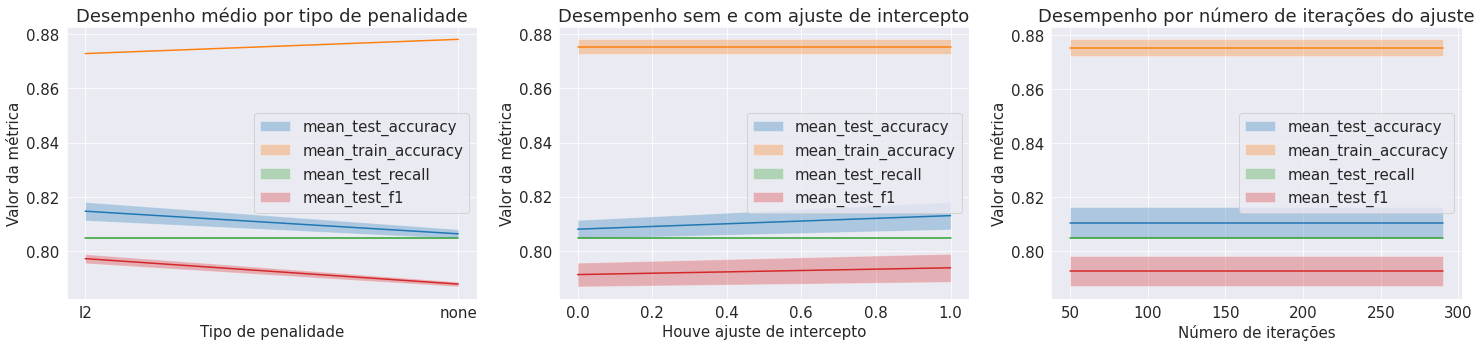

In [278]:
fig, axis = plt.subplots(1,3, figsize=(25,5))

penalty_plot_kwargs = {
  "hyperparameter": "param_penalty",
  "results": lr_results_df,
  "metrics": metrics,
  "title": "Desempenho médio por tipo de penalidade",
  "xlabel": "Tipo de penalidade",
  "ylabel": "Valor da métrica",
  "ax": axis[0]
}

fit_intercept_plot_kwargs = {
    "hyperparameter": "param_fit_intercept",
    "results": lr_results_df,
    "metrics": metrics,
    "title": "Desempenho sem e com ajuste de intercepto",
    "xlabel": "Houve ajuste de intercepto",
    "ylabel": "Valor da métrica",
    "ax": axis[1]
}

max_iter_kwargs = {
    "hyperparameter": "param_max_iter",
    "results": lr_results_df,
    "metrics": metrics,
    "title": "Desempenho por número de iterações do ajuste",
    "xlabel": "Número de iterações",
    "ylabel": "Valor da métrica",
    "ax": axis[2]
}

plot_hyperparameter_metric(**penalty_plot_kwargs)
plot_hyperparameter_metric(**fit_intercept_plot_kwargs)
plot_hyperparameter_metric(**max_iter_kwargs)

A penalidade L2 apresentou melhor acurácia mas menor Score F1, indicando que pode ter provocado a ocorrência de mais falsos positivos. O ajuste de um intercepto resultou em melhor acurácia e score F1, enquanto o número de iterações teve pouca influência no resultado. É possível isso signifique que o algoritmo de ajuste convergiu antes de atingir o número mínimo de iterações.

[1]https://drauziovarella.uol.com.br/doencas-e-sintomas/angina/

[2]http://www.saude.gov.br/saude-de-a-z/diabetes

[3]https://www.healthcareimaging.com.au/angiography-healthcare-imaging-services.html